In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 131322 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.1-0ubuntu3~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.1-0ubuntu3~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=ht

In [0]:
!mkdir -p drive

In [0]:
!google-drive-ocamlfuse drive

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


In [0]:
!ls drive

In [0]:
!pip install keras
!pip install h5py

In [0]:
!pip install torch torchvision

In [0]:
import torch
import torchvision


In [0]:
torch.cuda.is_available()

True

In [0]:
print(torch.tensor([2,2,1]))

tensor([2, 2, 1])


In [0]:
a=torch.tensor([2,2,1])
b=torch.tensor([[2,1,2,3],[2,3,6,7],[3,4,7,8]])
print(a)
print(b)

tensor([2, 2, 1])
tensor([[2, 1, 2, 3],
        [2, 3, 6, 7],
        [3, 4, 7, 8]])


In [0]:
print(a.shape)
print(b.shape)

torch.Size([3])
torch.Size([3, 4])


In [0]:
print(b.view(1,-1))

tensor([[2, 1, 2, 3, 2, 3, 6, 7, 3, 4, 7, 8]])


In [0]:
print(b)

tensor([[2, 1, 2, 3],
        [2, 3, 6, 7],
        [3, 4, 7, 8]])


In [0]:
b=b.view(-1,1)
print(b)
b=b.view(1,-1)

tensor([[2],
        [1],
        [2],
        [3],
        [2],
        [3],
        [6],
        [7],
        [3],
        [4],
        [7],
        [8]])


In [0]:
print(b)

tensor([[2, 1, 2, 3, 2, 3, 6, 7, 3, 4, 7, 8]])


In [0]:
r=torch.rand(4,4)
print(r)
rn=torch.rand(4,4)
print(rn)

tensor([[0.1403, 0.3465, 0.0569, 0.1078],
        [0.4665, 0.3474, 0.0684, 0.1022],
        [0.3918, 0.0163, 0.9881, 0.6755],
        [0.6768, 0.8625, 0.1836, 0.3245]])
tensor([[0.7734, 0.8327, 0.4467, 0.4827],
        [0.3478, 0.9291, 0.9286, 0.2057],
        [0.5622, 0.9592, 0.2872, 0.1908],
        [0.3665, 0.4398, 0.6534, 0.3940]])


In [0]:
rn=torch.randn(4,4)
print(rn)

tensor([[-1.1084, -0.1175,  1.2292, -2.0593],
        [ 0.5091,  2.7221, -0.0818, -0.2221],
        [ 1.2929,  1.5228, -0.7561, -1.7425],
        [-1.6308, -0.1546, -0.0107,  0.3328]])


In [0]:
x=torch.ones(2,2,requires_grad=True)
print(x)
y=x+2
print(y)
print(y.grad_fn)
z=y*y*3
out=z.mean()
print(z,out)
out.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)
tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [0]:
x=torch.zeros(2,2,requires_grad=True)
print(x)
y=x+2
print(y)
z=y*y*3
out=z.mean()
out.backward()
print(z,out)
#print("mean:",out)
print(x.grad)

tensor([[0., 0.],
        [0., 0.]], requires_grad=True)
tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)
tensor([[12., 12.],
        [12., 12.]], grad_fn=<MulBackward0>) tensor(12., grad_fn=<MeanBackward1>)
tensor([[3., 3.],
        [3., 3.]])


In [0]:
import numpy as np
np.square(3)

9

  0%|          | 0/170498071 [00:00<?, ?it/s]

170500096it [00:04, 36662727.70it/s]                               


Files already downloaded and verified


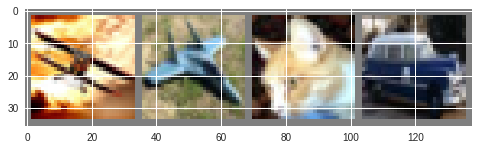

plane plane   cat   car


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [4]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.211
[1,  4000] loss: 1.846
[1,  6000] loss: 1.680
[1,  8000] loss: 1.573
[1, 10000] loss: 1.523
[1, 12000] loss: 1.473
[2,  2000] loss: 1.390
[2,  4000] loss: 1.391
[2,  6000] loss: 1.337
[2,  8000] loss: 1.303
[2, 10000] loss: 1.285
[2, 12000] loss: 1.291
Finished Training


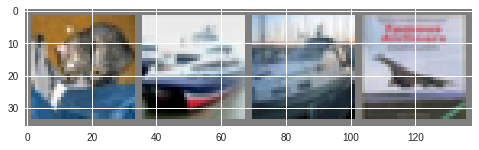

GroundTruth:    cat  ship  ship plane


In [5]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Predicted:   frog   car   car plane
Accuracy of the network on the 10000 test images: 54 %


In [7]:
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 80 %
Accuracy of  bird : 41 %
Accuracy of   cat : 16 %
Accuracy of  deer : 41 %
Accuracy of   dog : 43 %
Accuracy of  frog : 79 %
Accuracy of horse : 66 %
Accuracy of  ship : 64 %
Accuracy of truck : 63 %
